# Meridional heat transports

Equation (5) in Trenberth et al. (2001) says atmospheric heat transport is
$$
\mathbf{F}_A = \frac{1}{g} \int_o^{p_s} (h + k) \mathbf{v} ~dp. 
$$
where $h = s + Lq$ is the moist static energy, $s$ is the dry static energy, $q$ is the specific humidity, and $k$ is the kinetic energy. 

Equation (6) says the divergence of the transport equals the TOA heat flux minus the surface heat flux, assuming the atmosphere is in steady state and has no internal energy trend. 
$$
\nabla \cdot \mathbf{F}_A = R_T + F_s
$$
where $R_T$ is the TOA radiative heat flux (net SW+LW) and $F_s$ is the surface heat flux (SW+LW+sensible+latent). Heat fluxes over land are much weaker than over ocean, so $F_s$ is likely dominated by oceanic heat fluxes. 

We can now find the meridional energy transport from equation 6 above:
$$
\nabla \cdot \mathbf{F}_A = \frac{\partial F_{x,A}}{\partial x} + \frac{\partial F_{y,A}}{\partial y}  = R_T + F_s \\
\oint_x \frac{\partial F_{y,A}}{\partial y}~dx  = \oint_x (R_T + F_s) ~dx \\
\oint_x F_{y,A}~dx  = \int_y \oint_x (R_T + F_s) ~dx~dy 
$$

The boundary condition at $F_{y=-90^\circ,A} = 0$ makes sense. Ideally we should find  $F_{y=90^\circ,A} = 0$ at the end of the integral, but due to various errors we will not. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean 

In [2]:
import foci_functions

## Read OpenIFS data

In [3]:
exp_list = ['FOCI_GJK029']
time_list = [slice('2050-01-01','2550-01-01')]

In [4]:
ds_oifs_1y = foci_functions.read_openifs(exp_list, time_list, grid='regular_sfc', freq='1y')

/gxfs_work1/geomar/smomw352/esm-experiments//FOCI_GJK029/outdata/oifs/ym/*1y*regular_sfc.nc


In [9]:
ds_oifs_1y[0]

<xarray.Dataset>
Dimensions:            (time: 500, bnds: 2, lon: 192, lat: 96)
Coordinates:
  * time               (time) object 2050-07-01 06:00:00 ... 2549-07-01 06:00:00
  * lon                (lon) float32 0.9375 2.812 4.688 ... 355.3 357.2 359.1
  * lat                (lat) float32 -89.06 -87.19 -85.31 ... 85.31 87.19 89.06
Dimensions without coordinates: bnds
Data variables: (12/45)
    time_counter_bnds  (time, bnds) object dask.array<chunksize=(10, 2), meta=np.ndarray>
    sstk               (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
    ci                 (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
    es                 (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
    tclw               (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
    tciw               (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
    ...                 ...
    swvl1              (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
    swvl2              (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
    swvl3              (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
    swvl4              (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
    sro                (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
    ssro               (time, lat, lon) float32 dask.array<chunksize=(10, 96, 192), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         ECE3_1m_18500101_regular_sfc
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2023-Feb-19 13:41:02 GMT
    uuid:         3b3166db-6c1a-4d78-ba3e-27bee07b9dfe
    history:      Mon Feb 20 11:30:37 2023: ncks -7 --no-alphabetize -L 1 --c...
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...
    frequency:    year
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [10]:
areacella = xr.open_dataset('/gxfs_work1/geomar/smomw352/esm-experiments/FOCI_GJK029/outdata/oifs/areacella.nc')['areacella']

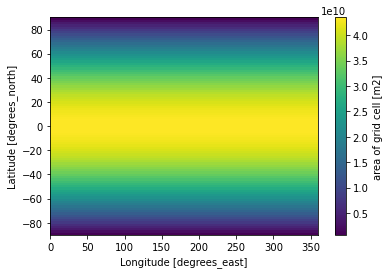

In [11]:
areacella.plot()

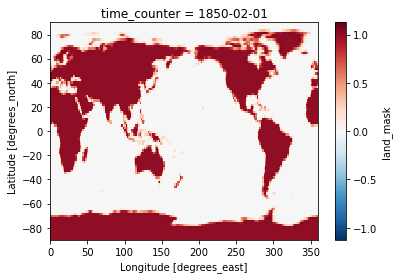

In [24]:
lsm = xr.open_dataset('/gxfs_work1/geomar/smomw352/esm-experiments/FOCI_GJK029/outdata/oifs/lsm.nc')['land_mask'][0,:,:]
lsm.plot()

## Read ERA-5 data

In [55]:
# Read surface fluxes
ds_sfc = xr.open_dataset('/gxfs_work1/geomar/smomw352/reanalysis_obs/era5_surface_heat_fluxes_1950-2022_1deg_scaled.nc')
ds_toa = xr.open_dataset('/gxfs_work1/geomar/smomw352/reanalysis_obs/era5_toa_heat_fluxes_1950-2022_1deg_scaled.nc')
ds_lsm = xr.open_dataset('/gxfs_work1/geomar/smomw352/reanalysis_obs/era5_lsm_r360x180.nc')
ds_area = xr.open_dataset('/gxfs_work1/geomar/smomw352/reanalysis_obs/era5_gridarea_r360x180.nc')

In [57]:
ds_era5 = xr.merge([ds_sfc, ds_toa]).groupby('time.year').mean('time')

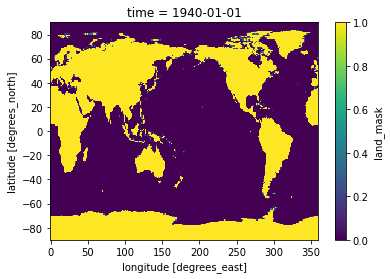

In [70]:
lsm = ds_lsm['land_mask']
lsm = lsm.where(lsm <= 0.5, 1, 0)
lsm.plot()

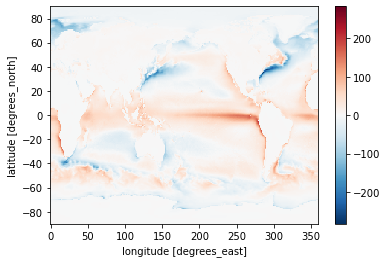

In [72]:
((ds_era5['ssr'] + ds_era5['str'] + ds_era5['sshf'] + ds_era5['slhf'])).mean('year').plot()

## Compute meridional energy transport

In [63]:
def mht(ds, areacella, lsm, scale=21600):
    """
    Compute meridional energy transport
    """
    
    # R_T in equation 5. TOA net heat flux. W/m2
    rt = (ds['tsr'] + ds['ttr']) / scale
    
    # F_s in equation 5. Net surface heat flux. W/m2
    fs = (ds['ssr'] + ds['str'] + ds['sshf'] + ds['slhf']) / scale
    
    # Multiply by surface area. W. 
    rt_a = rt * areacella
    fs_a = fs * areacella
    fso_a = fs * areacella * (1-lsm) # surface heat flux over ocean
    
    # Zonal integral
    rt_x = rt_a.sum('lon')
    fs_x = fs_a.sum('lon')
    fso_x = fso_a.sum('lon')
    
    # Meridional integral
    rt_xy = rt_x.cumsum('lat')
    fs_xy = fs_x.cumsum('lat')
    fso_xy = fso_x.cumsum('lat')
    
    rt_xy.name = 'rt_int'
    fs_xy.name = 'fs_int'
    fso_xy.name = 'fso_int'
    
    # Atmospheric heat transport
    fa = (rt_xy - fs_xy) * 1e-15 # [PW]
    fa.name = 'f_atm'
    
    # Oceanic heat transport
    fo = fso_xy * 1e-15 # [PW]
    fo.name = 'f_oce'
    
    # Total
    ft = fa + fo 
    ft.name = 'f_tot'
    
    ds = xr.merge([rt_xy, fs_xy, fso_xy, fa, fo, ft])
    
    return ds

In [58]:
ds_mht = mht(ds_oifs_1y[0], areacella, lsm)
ds_mht

<xarray.Dataset>
Dimensions:       (time: 500, lat: 96)
Coordinates:
  * time          (time) object 2050-07-01 06:00:00 ... 2549-07-01 06:00:00
  * lat           (lat) float32 -89.06 -87.19 -85.31 ... 85.31 87.19 89.06
    time_counter  datetime64[ns] 1850-02-01
Data variables:
    rt_int        (time, lat) float64 dask.array<chunksize=(10, 96), meta=np.ndarray>
    fs_int        (time, lat) float64 dask.array<chunksize=(10, 96), meta=np.ndarray>
    fso_int       (time, lat) float64 dask.array<chunksize=(10, 96), meta=np.ndarray>
    f_atm         (time, lat) float64 dask.array<chunksize=(10, 96), meta=np.ndarray>
    f_oce         (time, lat) float64 dask.array<chunksize=(10, 96), meta=np.ndarray>
    f_tot         (time, lat) float64 dask.array<chunksize=(10, 96), meta=np.ndarray>

In [64]:
ds_mht_era5 = mht(ds_era5, ds_area['cell_area'], ds_lsm['land_mask'], scale=1)
ds_mht_era5

<xarray.Dataset>
Dimensions:  (lat: 180, year: 73, time: 1)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * year     (year) int64 1950 1951 1952 1953 1954 ... 2018 2019 2020 2021 2022
  * time     (time) datetime64[ns] 1940-01-01
Data variables:
    rt_int   (year, lat) float64 -3.754e+12 -1.501e+13 ... 3.639e+14 3.589e+14
    fs_int   (year, lat) float64 -8.403e+09 -3.125e+10 ... 2.077e+15 2.076e+15
    fso_int  (year, lat, time) float64 0.0 0.0 0.0 ... 1.984e+15 1.984e+15
    f_atm    (year, lat) float64 -0.003745 -0.01497 -0.03407 ... -1.713 -1.717
    f_oce    (year, lat, time) float64 0.0 0.0 0.0 ... 1.985 1.984 1.984
    f_tot    (year, lat, time) float64 -0.003745 -0.01497 ... 0.2715 0.2665

## Plot meridional heat transport

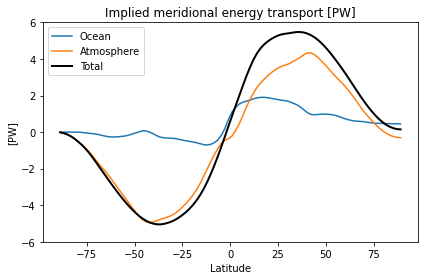

In [73]:
fig, ax = plt.subplots(1,1)
p1, = ds_mht['f_oce'].mean('time').plot(ax=ax, label='Ocean')
p2, = ds_mht['f_atm'].mean('time').plot(ax=ax, label='Atmosphere')
p3, = ds_mht['f_tot'].mean('time').plot(ax=ax, label='Total', color='k', lw=2)

#ds_mht_era5['f_oce'].mean('year').plot(ax=ax, color=p1.get_color(), linestyle='--')
#ds_mht_era5['f_atm'].mean('year').plot(ax=ax, color=p2.get_color(), linestyle='--')
#ds_mht_era5['f_tot'].mean('year').plot(ax=ax, color=p3.get_color(), lw=2, linestyle='--')

ax.legend()
ax.set_xlabel('Latitude')
ax.set_ylabel('[PW]')
ax.set_title('Implied meridional energy transport [PW]')
vmax = np.max(np.abs([ax.get_ylim()[0],ax.get_ylim()[1]]))
ax.set_ylim([-vmax,vmax])
fig.tight_layout()
fig.savefig('plots/meridional_energy_transport.pdf',format='pdf')

6.003156118073561